### __Imports__

In [1]:
import torch
import torch.nn as nn
import scipy.stats as stats
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torch import optim
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

In [2]:
from icnnet import ICNNet
from mydataset import MyDataset, get_gaussian_dataset, get_gaussian_transport_dataset
from toy_data_dataloader_gaussian import generate_gaussian_dataset
from train_picnn import PICNNtrain
from train_makkuva import train_makkuva, train_makkuva_epoch

In [3]:
%load_ext autoreload
%autoreload 2

## __Generate dataset__


In [4]:
dataset = generate_gaussian_dataset(d=2, r=200, N=200)
gaussian_dataset = get_gaussian_dataset(dataset)
gaussian_transport_dataset = get_gaussian_transport_dataset(gaussian_dataset)

c:\Users\dmgtr\OneDrive - Ecole Polytechnique\3A\P2\MAP588 - EA CondOT\CondOT\gaussian_transport.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = torch.tensor(u)


## __Initialization__

### __PICNN training__

In [5]:
input_size = 2
output_size = 1
context_layer_sizes = [input_size, 64, 64, 64,output_size]
layer_sizes = [input_size, 64, 64, 64,output_size]

model_init_f = ICNNet(input_size = input_size, layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes)
model_init_g = ICNNet(input_size = input_size, layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes)

In [6]:
print('training f')
gaussian_transport_dataloader = DataLoader(gaussian_transport_dataset, batch_size=50, shuffle=True)
PICNNtrain(model_init_f, gaussian_transport_dataloader, epochs=100)

print('training g')
reversed_gaussian_dataset = MyDataset(gaussian_dataset.Y, gaussian_dataset.C, gaussian_dataset.X)
gaussian_transport_dataset_reversed = get_gaussian_transport_dataset(reversed_gaussian_dataset)
gaussian_transport_dataloader_reversed = DataLoader(gaussian_transport_dataset_reversed, batch_size=50, shuffle=True)
PICNNtrain(model_init_g, gaussian_transport_dataloader_reversed, epochs=100)

training f


c:\Users\dmgtr\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\dmgtr\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([50, 200, 2])) that is different to the input size (torch.Size([50, 200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100 Loss: 29.98771858215332
Epoch 2/100 Loss: 19.61832046508789
Epoch 3/100 Loss: 15.985172271728516
Epoch 4/100 Loss: 14.455684661865234
Epoch 5/100 Loss: 12.837844848632812
Epoch 6/100 Loss: 11.571898460388184
Epoch 7/100 Loss: 8.296890258789062
Epoch 8/100 Loss: 7.724178314208984
Epoch 9/100 Loss: 6.478063106536865
Epoch 10/100 Loss: 6.348884105682373
Epoch 11/100 Loss: 6.226074695587158
Epoch 12/100 Loss: 5.737787246704102
Epoch 13/100 Loss: 5.066068649291992
Epoch 14/100 Loss: 5.044496536254883
Epoch 15/100 Loss: 4.5987868309021
Epoch 16/100 Loss: 4.780256748199463
Epoch 17/100 Loss: 4.889528274536133
Epoch 18/100 Loss: 4.396961212158203
Epoch 19/100 Loss: 4.283146858215332
Epoch 20/100 Loss: 4.792080879211426
Epoch 21/100 Loss: 4.094792366027832
Epoch 22/100 Loss: 4.7198967933654785
Epoch 23/100 Loss: 4.220941066741943
Epoch 24/100 Loss: 4.379228591918945
Epoch 25/100 Loss: 4.350064277648926
Epoch 26/100 Loss: 4.17018985748291
Epoch 27/100 Loss: 4.2054524421691895
Epoch 2

c:\Users\dmgtr\OneDrive - Ecole Polytechnique\3A\P2\MAP588 - EA CondOT\CondOT\gaussian_transport.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = torch.tensor(u)


Epoch 1/100 Loss: 2.8687539100646973
Epoch 2/100 Loss: 2.5375521183013916
Epoch 3/100 Loss: 2.5017781257629395
Epoch 4/100 Loss: 2.4485085010528564
Epoch 5/100 Loss: 2.2221155166625977
Epoch 6/100 Loss: 2.312378406524658
Epoch 7/100 Loss: 2.2497239112854004
Epoch 8/100 Loss: 2.0268185138702393
Epoch 9/100 Loss: 2.244394540786743
Epoch 10/100 Loss: 1.9828321933746338
Epoch 11/100 Loss: 1.9079538583755493
Epoch 12/100 Loss: 2.0268783569335938
Epoch 13/100 Loss: 2.017268180847168
Epoch 14/100 Loss: 2.0199849605560303
Epoch 15/100 Loss: 2.1115026473999023
Epoch 16/100 Loss: 1.8355789184570312
Epoch 17/100 Loss: 1.899257779121399
Epoch 18/100 Loss: 1.9369441270828247
Epoch 19/100 Loss: 1.8923401832580566
Epoch 20/100 Loss: 1.8651049137115479
Epoch 21/100 Loss: 1.826938509941101
Epoch 22/100 Loss: 1.8408267498016357
Epoch 23/100 Loss: 1.6508409976959229
Epoch 24/100 Loss: 1.6015466451644897
Epoch 25/100 Loss: 1.6579262018203735
Epoch 26/100 Loss: 1.6180511713027954
Epoch 27/100 Loss: 1.55656

In [7]:
state_dict_init_f = model_init_f.state_dict()
state_dict_init_g = model_init_g.state_dict()

In [8]:
test = 89
n_points = 200
X, Y, C = gaussian_dataset.X, gaussian_dataset.Y, gaussian_dataset.C

x_i, y_i, c_i = X[test, :n_points, :].requires_grad_(True), Y[test, :n_points, :].requires_grad_(True), C[test, :n_points, :]

#Calcul de la dérivée du PICNN
output_model_f = model_init_f(x_i, c_i)
grad_model_f = torch.autograd.grad(outputs=output_model_f, inputs=x_i, grad_outputs=torch.ones_like(output_model_f), create_graph=True)[0].detach().numpy()

output_model_g = model_init_g(y_i, c_i)
grad_model_g = torch.autograd.grad(outputs=output_model_g, inputs=y_i, grad_outputs=torch.ones_like(output_model_g), create_graph=True)[0].detach().numpy()

x_i, y_i = x_i.detach().numpy(), y_i.detach().numpy()

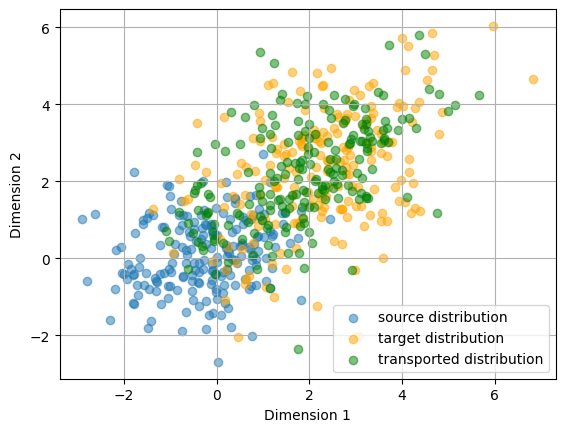

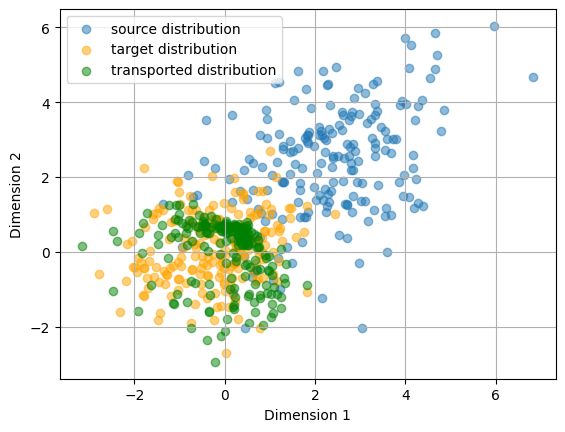

In [9]:
def plot_transport(source_distribution, target_distribution, transported_distribution):
    plt.scatter(source_distribution[:, 0], source_distribution[:, 1], alpha=0.5, label='source distribution')
    plt.scatter(target_distribution[:, 0], target_distribution[:, 1], color='orange', alpha=0.5, label='target distribution')
    plt.scatter(transported_distribution[:, 0], transported_distribution[:, 1], alpha=0.5, color='green', label='transported distribution')

    for i in range(x_i.shape[0]):
        t=1
        #plt.arrow(source_distribution[i, 0], source_distribution[i, 1], transported_distribution[i, 0] - source_distribution[i, 0], transported_distribution[i, 1] - source_distribution[i, 1], color='green', alpha=0.25, head_width=0.1, head_length=0.1, length_includes_head=True)
        #plt.arrow(transported_distribution[i, 0], transported_distribution[i, 1], target_distribution[i, 0] - transported_distribution[i, 0], target_distribution[i, 1] - transported_distribution[i, 1], color='orange', alpha=0.25, head_width=0.1, head_length=0.1, length_includes_head=True)

        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_transport(source_distribution=x_i, target_distribution=y_i, transported_distribution=grad_model_f)
plot_transport(source_distribution=y_i, target_distribution=x_i, transported_distribution=grad_model_g)

## __Makkuva__

In [10]:
ICNNf = ICNNet(input_size = input_size, layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes)
ICNNg = ICNNet(input_size = input_size, layer_sizes = layer_sizes, context_layer_sizes=context_layer_sizes)

# Load the state dictionary into ICNNf and ICNNg
ICNNf.load_state_dict(state_dict_init_f)
ICNNg.load_state_dict(state_dict_init_g)

<All keys matched successfully>

In [11]:
dataloader = DataLoader(dataset, batch_size=50, shuffle=True)

for epoch in range(50) :
    print('epoch :', epoch + 1, end=('\r'))
    train_makkuva_epoch(ICNNf, ICNNg, dataloader)

loss_g: 2.046619176864624, loss_f: 0.08223035605624318
loss_g: 1.8779737949371338, loss_f: 0.6550644189119339
loss_g: 1.551720142364502, loss_f: -2.077595442533493
loss_g: 2.5089378356933594, loss_f: 1.912821650505066
loss_g: 1.219728946685791, loss_f: -3.088381767272949
loss_g: 2.611816644668579, loss_f: 1.764804482460022
loss_g: 1.3318238258361816, loss_f: -2.6737951040267944
loss_g: 2.6396398544311523, loss_f: 1.7399644553661346
loss_g: 1.3749290704727173, loss_f: -2.72465842962265
loss_g: 2.682777166366577, loss_f: 1.7342734336853027
loss_g: 1.460514783859253, loss_f: -2.69805109500885
loss_g: 3.0868005752563477, loss_f: 1.7222175896167755
loss_g: 1.580063819885254, loss_f: -2.9347406029701233
loss_g: 2.9545087814331055, loss_f: 1.8305132985115051
loss_g: 1.6659049987792969, loss_f: -3.14177268743515
loss_g: 3.0042405128479004, loss_f: 1.9799256026744843
loss_g: 1.7506659030914307, loss_f: -2.9843472838401794
loss_g: 3.1516222953796387, loss_f: 2.0740387439727783
loss_g: 1.85804843

In [12]:
# filename_pth_f = 'ICNNf_TR.pth'
# filename_pth_g = 'ICNNg_TR.pth'

# torch.save(ICNNf.state_dict(), filename_pth_f)
# torch.save(ICNNg.state_dict(), filename_pth_g)

In [13]:
test = 5
n_points = 200
X, Y, C = dataset.X, dataset.Y, dataset.C
x_i, y_i, c_i = X[test, :n_points, :].requires_grad_(True), Y[test, :n_points, :].requires_grad_(True), C[test, :n_points, :]

#Calcul de la dérivée du PICNN
output_model_f = ICNNf(x_i, c_i)
grad_model_f = torch.autograd.grad(outputs=output_model_f, inputs=x_i, grad_outputs=torch.ones_like(output_model_f), create_graph=True)[0].detach().numpy()

output_model_g = model_init_g(y_i, c_i)
grad_model_g = torch.autograd.grad(outputs=output_model_g, inputs=y_i, grad_outputs=torch.ones_like(output_model_g), create_graph=True)[0].detach().numpy()

x_i, y_i = x_i.detach().numpy(), y_i.detach().numpy()

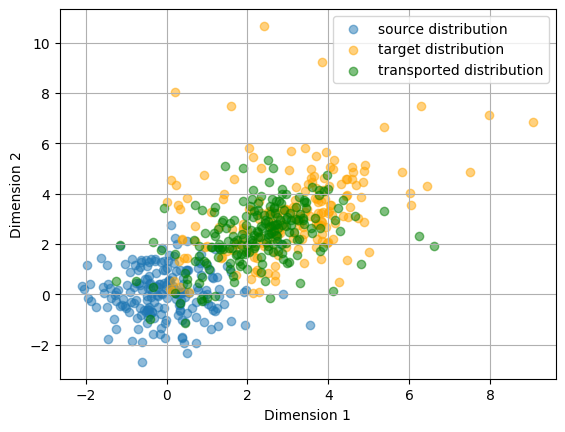

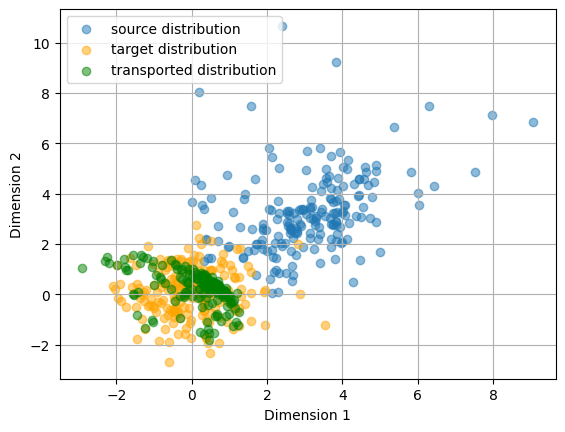

In [14]:
plot_transport(source_distribution=x_i, target_distribution=y_i, transported_distribution=grad_model_f)
plot_transport(source_distribution=y_i, target_distribution=x_i, transported_distribution=grad_model_g)